Vytvořte klasifikátor pro 3 nejfrekventovanější skupiny, pro každou zvlášť.
- Zrealizujte v prostředí Orange a Jupyter.
- Doplňte úspěšnost klasifikace, přesnost, úplnost a f-score.
- Doplňte koeficient kappa pro danou klasifikaci. 
- Kolik je úspěšnost náhodného klasifikátoru pro danou úlohu.

V prostředí Orange relizováno na hodině, všechny základní parametry klasifikátoru jsou v uzlu _test and score_ a _confusion matrix_ v přiloženém souboru _classifiaction.ows_

In [14]:
import pandas as pd

data = pd.read_csv('lc-basket-01 1.tab', sep='\t', skiprows=[1])
data.head()

,cardid,value,pmethod,sex,homeown,income,age,fruitveg,freshmeat,dairy,cannedveg,cannedmeat,frozenmeal,beer,wine,softdrink,fish,confectionery
0,39808,42.7123,CHEQUE,M,NO,27000,46,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,67362,25.3567,CASH,Z,NO,30000,28,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,10872,20.6176,CASH,M,NO,13200,36,NaN,NaN,NaN,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN
3,26748,23.6883,CARD,Z,NO,12200,26,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,91609,18.8133,CARD,M,YES,11000,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
item_columns = data.columns[7:]
item_columns

Index(['fruitveg', 'freshmeat', 'dairy', 'cannedveg', 'cannedmeat',
       'frozenmeal', 'beer', 'wine', 'softdrink', 'fish', 'confectionery '],
      dtype='object')

In [17]:
group1_items = ['cannedveg', 'frozenmeal', 'beer']
group2_items = ['fruitveg', 'fish']
group3_items = ['frozenmeal', 'beer']

In [19]:
def contains_group(row, items):
    # 1 = nákup, 0/NaN = nenákup
    return all(row[item] == 1 for item in items)

# Vytvoření cílových proměnných (Target Variables)
data[item_columns] = data[item_columns].fillna(0).astype(float)
data['Target_Group'] = data.apply(lambda row: contains_group(row, group1_items), axis=1).astype(int)
print(data.head())

   cardid    value pmethod sex homeown  income  age  fruitveg  freshmeat  \
0   39808  42.7123  CHEQUE   M      NO   27000   46       0.0        1.0   
1   67362  25.3567    CASH   Z      NO   30000   28       0.0        1.0   
2   10872  20.6176    CASH   M      NO   13200   36       0.0        0.0   
3   26748  23.6883    CARD   Z      NO   12200   26       0.0        0.0   
4   91609  18.8133    CARD   M     YES   11000   24       0.0        0.0   

   dairy  cannedveg  cannedmeat  frozenmeal  beer  wine  softdrink  fish  \
0    1.0        0.0         0.0         0.0   0.0   0.0        0.0   0.0   
1    0.0        0.0         0.0         0.0   0.0   0.0        0.0   0.0   
2    0.0        1.0         0.0         1.0   1.0   0.0        0.0   1.0   
3    1.0        0.0         0.0         0.0   0.0   1.0        0.0   0.0   
4    0.0        0.0         0.0         0.0   0.0   0.0        0.0   0.0   

   confectionery   Target_Group  
0             1.0             0  
1             1.0 

In [25]:
from sklearn.model_selection import train_test_split

y = data['Target_Group']
X = data.drop(columns=['Target_Group', 'cardid'] + group1_items)

# Změnit kategrické proměnné na dummy
X = pd.get_dummies(X, columns=['pmethod', 'sex', 'homeown'], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [27]:
y_pred = tree.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score
print(f'Přesnost: {accuracy_score(y_test, y_pred):.3f}')

Přesnost: 0.957


In [30]:
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(y_test, y_pred)
cmatrix

array([[250,  11],
       [  2,  37]])

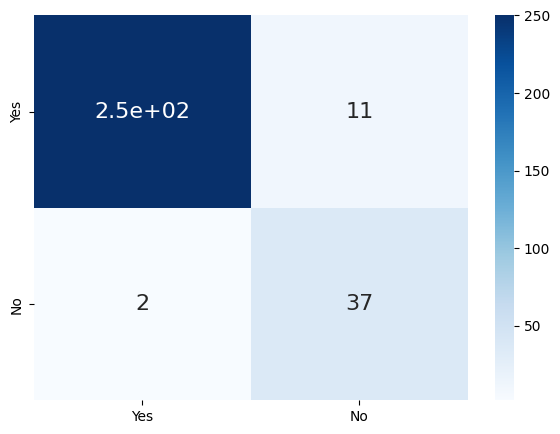

In [34]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cmatrix, ["Yes", "No"], ["Yes", "No"])
plt.figure(figsize = (7,5))
#sn.heatmap(df_cm, cmap="Greys", annot=True, annot_kws={"size": 16})
sn.heatmap(df_cm, cmap="Blues", annot=True, annot_kws={"size": 16})
#plt.savefig('dm-evaluate-orange-cmatrix.png')
plt.show()

In [35]:
from sklearn.metrics import precision_score
p = precision_score(y_test, y_pred, average='weighted')
print(f'Přesnost: {p:.3f}')
print(precision_score(y_test, y_pred, average=None))

Přesnost: 0.963
[0.99206349 0.77083333]


In [36]:
from sklearn.metrics import recall_score

print(recall_score(y_test, y_pred, average=None))
print('Úplnost: {:.3f}'.format(recall_score(y_test, y_pred, average='weighted')))

[0.95785441 0.94871795]
Úplnost: 0.957


In [37]:
from sklearn.metrics import f1_score

print(f1_score(y_test, y_pred, average=None))
print('F-score: {:.3f}'.format(f1_score(y_test, y_pred, average='weighted')))

[0.97465887 0.85057471]
F-score: 0.959
